In [2]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Load the dataset
df = pd.read_csv("Iris.csv")  # Adjust the path if needed

# Drop ID column if present
df = df.drop(columns=['Id'], errors='ignore')

# Separate features and target
X = df.drop('Species', axis=1)
y = df['Species']

# Normalize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [4]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Try different values of K
k_values = [1, 3, 5, 7, 9]
accuracies = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    accuracies.append(acc)
    print(f"K={k} Accuracy: {acc:.2f}")

K=1 Accuracy: 0.97
K=3 Accuracy: 1.00
K=5 Accuracy: 1.00
K=7 Accuracy: 1.00
K=9 Accuracy: 1.00


In [14]:
print(type(y_test))
print(type(y_pred))

print(y_test.dtype)
print(y_pred.dtype)

<class 'pandas.core.series.Series'>
<class 'numpy.ndarray'>
object
object


In [16]:
import numpy as np

# Convert to numpy arrays
y_test = np.array(y_test)
y_pred = np.array(y_pred)

In [18]:
print(np.isnan(X_test).any())  # Should be False
print(np.isinf(X_test).any())  # Should be False

False
False


In [20]:
print(X.dtypes)

SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
dtype: object


In [22]:
# If there are non-numeric columns, convert or drop them
X = pd.DataFrame(X)  # Ensure it's a DataFrame
X = X.apply(pd.to_numeric, errors='coerce')  # convert or set invalid to NaN
X = X.fillna(0)  # or X.dropna()

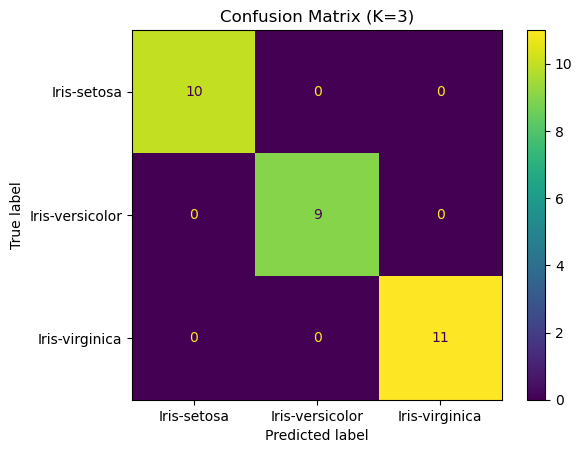

In [24]:
# Use best K (e.g., K=3)
best_k = 3
knn = KNeighborsClassifier(n_neighbors=best_k)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred, labels=knn.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=knn.classes_)
disp.plot()
plt.title(f"Confusion Matrix (K={best_k})")
plt.show()

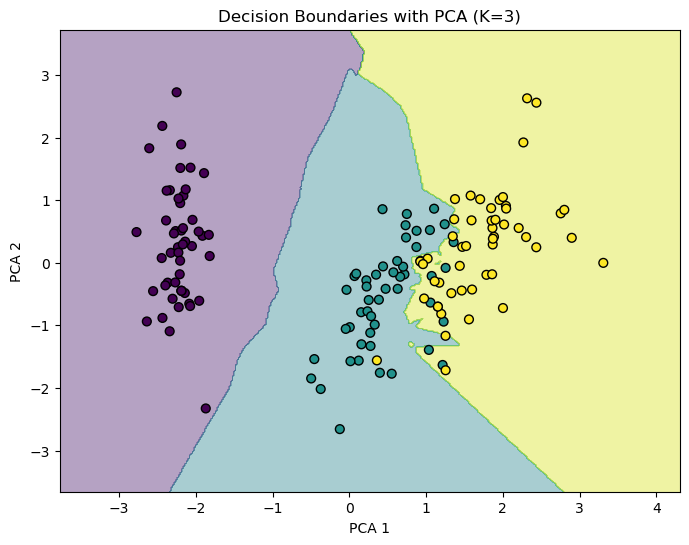

In [30]:
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
import pandas as pd

# PCA to reduce features to 2D
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Make sure y is a simple NumPy array of strings or labels
y = np.array(y)  # If it's not already

# Convert target labels to numeric for color mapping (for plotting)
y_numeric, uniques = pd.factorize(y)  # y_numeric = [0, 1, 2...]

# Split PCA-transformed data
X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(X_pca, y, test_size=0.2, random_state=42)

# Train KNN on PCA-reduced data
best_k = 3
knn_pca = KNeighborsClassifier(n_neighbors=best_k)
knn_pca.fit(X_train_pca, y_train_pca)

# Set up meshgrid for decision boundary
h = 0.02
x_min, x_max = X_pca[:, 0].min() - 1, X_pca[:, 0].max() + 1
y_min, y_max = X_pca[:, 1].min() - 1, X_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

# Predict class for each point in the meshgrid
Z = knn_pca.predict(np.c_[xx.ravel(), yy.ravel()])
Z_numeric, _ = pd.factorize(Z)  # Convert prediction labels to numeric if needed
Z_numeric = Z_numeric.reshape(xx.shape)

# Plot the decision boundary
plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z_numeric, alpha=0.4, cmap='viridis')

# Plot training points
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_numeric, cmap='viridis', edgecolor='k', s=40)
plt.title(f"Decision Boundaries with PCA (K={best_k})")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.grid(False)
plt.show()